/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


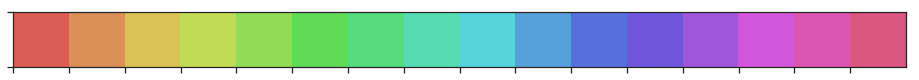

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=False)
matplotlib.rcParams['svg.fonttype'] = 'none'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

sys.path.insert(0, '/home/bay001/projects/codebase/rbp-maps/maps/')
from density import Map
from density import ReadDensity
from density import normalization_functions
from density import RDPlotter
from density import LineObject as dline
from peak import LineObject as pline
from peak import PeakPlotter

sns.palplot(sns.color_palette("hls", 16))
colors = sns.color_palette("hls", 16)
density_colors = [colors[0], colors[9], 'black']
peak_colors = [colors[1], colors[8], 'black']

In [2]:
density_dir = '/projects/ps-yeolab3/bay001/maps/current/se'
peak_dir = '/projects/ps-yeolab3/bay001/maps/current/se_peak'

rbfox2_density_included = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.1.RBFOX2-BGHLV26-HepG2-included-upon-knockdown.normed_matrix.txt')
rbfox2_density_excluded = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.1.RBFOX2-BGHLV26-HepG2-excluded-upon-knockdown.normed_matrix.txt')
rbfox2_density_native_cass = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.1.HepG2_native_cassette_exons.normed_matrix.txt')
rbfox2_peak_included = os.path.join(peak_dir, '204_01.basedon_204_01.peaks.l2inputnormnew.bed.compressed.RBFOX2-BGHLV26-HepG2-included-upon-knockdown.hist')
rbfox2_peak_excluded = os.path.join(peak_dir, '204_01.basedon_204_01.peaks.l2inputnormnew.bed.compressed.RBFOX2-BGHLV26-HepG2-excluded-upon-knockdown.hist')
rbfox2_peak_native_cass = os.path.join(peak_dir, '204_01.basedon_204_01.peaks.l2inputnormnew.bed.compressed.HepG2-native-cassette-exons.miso.hist')

In [3]:
p=3
fc=0

peak_dir = '/home/elvannostrand/data/clip/CLIPseq_analysis/ENCODE_CLIPperv2_20161120/'
peak_annotation_dir = '/projects/ps-yeolab3/bay001/maps/current_annotations/as_miso_renamed'

out_incl_hist = '/projects/ps-yeolab3/bay001/maps/test/incl.txt'# temp file
out_excl_hist = '/projects/ps-yeolab3/bay001/maps/test/excl.txt'# temp file
out_excl_hist = '/projects/ps-yeolab3/bay001/maps/test/bg.txt'# temp file

rbfox2_peak_bed = os.path.join(peak_dir, '204_01.basedon_204_01.peaks.l2inputnormnew.bed.compressed.bed')
peak_included_annotation = os.path.join(peak_annotation_dir, 'RBFOX2-BGHLV26-HepG2-included-upon-knockdown')
peak_excluded_annotation = os.path.join(peak_annotation_dir, 'RBFOX2-BGHLV26-HepG2-excluded-upon-knockdown')
peak_bg_annotation = os.path.join(peak_annotation_dir, 'HepG2-native-cassette-exons.miso')

peak_incl = pline.LineObject(
    infile=rbfox2_peak_bed,
    out_hist=out_incl_hist,
    annotation=peak_included_annotation,
    l10p_cutoff=p,
    l2fc_cutoff=fc,
    hashing_val=100000,
    event_type='se',
    exon_overhang=50,
    intron_overhang=300,
    color=peak_colors[0],
    min_event_threshold=100
)

peak_excl = pline.LineObject(
    infile=rbfox2_peak_bed,
    out_hist=out_excl_hist,
    annotation=peak_excluded_annotation,
    l10p_cutoff=p,
    l2fc_cutoff=fc,
    hashing_val=100000,
    event_type='se',
    exon_overhang=50,
    intron_overhang=300,
    color=peak_colors[1],
    min_event_threshold=100
)
"""
peak_bg = pline.LineObject(
    infile=rbfox2_peak_bed,
    out_hist=out_excl_hist,
    annotation=peak_bg_annotation,
    l10p_cutoff=p,
    l2fc_cutoff=fc,
    hashing_val=100000,
    event_type='se',
    exon_overhang=50,
    intron_overhang=300,
    color='black',
    min_event_threshold=10000000
)"""

"\npeak_bg = pline.LineObject(\n    infile=rbfox2_peak_bed,\n    out_hist=out_excl_hist,\n    annotation=peak_bg_annotation,\n    l10p_cutoff=p,\n    l2fc_cutoff=fc,\n    hashing_val=100000,\n    event_type='se',\n    exon_overhang=50,\n    intron_overhang=300,\n    color='black',\n    min_event_threshold=10000000\n)"

In [4]:
density_incl = dline.LineObject(
    event_matrix=pd.read_table(rbfox2_density_included, sep=',', index_col=0),
    annotation='Included upon knockdown',
    conf=0.95,
    color=density_colors[0], # blueish
    min_event_threshold=100
)
density_excl = dline.LineObject(
    event_matrix=pd.read_table(rbfox2_density_excluded, sep=',', index_col=0),
    annotation='Excluded upon knockdown',
    conf=0.95,
    color=density_colors[1], # reddish
    min_event_threshold=100
)
"""
density_bg = dline.LineObject(
    event_matrix=pd.read_table(rbfox2_density_native_cass, sep=',', index_col=0),
    annotation='Native cassettes',
    conf=0.95,
    color='black',
    min_event_threshold=100000000
)"""

((113, 1400), 'Included upon knockdown (113 events)')
((138, 1400), 'Excluded upon knockdown (138 events)')


"\ndensity_bg = dline.LineObject(\n    event_matrix=pd.read_table(rbfox2_density_native_cass, sep=',', index_col=0),\n    annotation='Native cassettes',\n    conf=0.95,\n    color='black',\n    min_event_threshold=100000000\n)"

/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


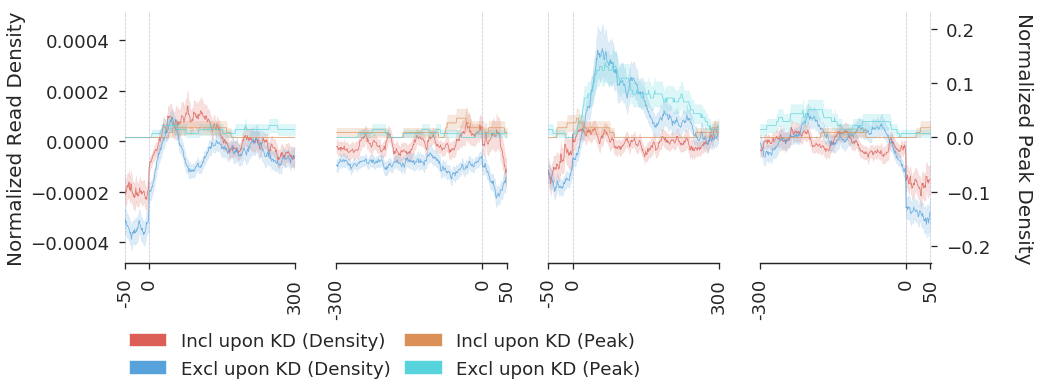

In [5]:
import matplotlib.patches as mpatches

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(15, 5))

axs = [ax1, ax2, ax3, ax4]

ax5 = ax1.twinx()
ax6 = ax2.twinx()
ax7 = ax3.twinx()
ax8 = ax4.twinx()

paxs = [ax5, ax6, ax7, ax8]


    
# ax1.set_ylim(-0.001, 0.001)

RDPlotter.plot_se([density_incl, density_excl], axs, density_colors) # density_bg
PeakPlotter.plot_se([peak_incl, peak_excl], paxs, legend=False) # peak_bg
ax1.set_ylabel("Normalized Read Density")
ax5.yaxis.set_visible(False)
ax8.yaxis.set_visible(True)
ax8.set_ylabel("Normalized Peak Density", rotation=270)
ax8.yaxis.tick_right()
ax8.yaxis.set_label_coords(1.6, 0.5) 
ax5.set_ylim(-0.23, 0.23)
ax6.set_ylim(-0.23, 0.23)
ax7.set_ylim(-0.23, 0.23)
ax8.set_ylim(-0.23, 0.23)
plt.tight_layout()

incl_peak_patch = mpatches.Patch(color=peak_colors[0], label='Incl upon KD (Peak)')
excl_peak_patch = mpatches.Patch(color=peak_colors[1], label='Excl upon KD (Peak)')
incl_density_patch = mpatches.Patch(color=density_colors[0], label='Incl upon KD (Density)')
excl_density_patch = mpatches.Patch(color=density_colors[1], label='Excl upon KD (Density)')

leg = axs[0].legend(
    bbox_to_anchor=(1.6, -0.25), loc=1, mode="expand",
    handles=[incl_peak_patch, excl_peak_patch, incl_density_patch, excl_density_patch],
    borderaxespad=0., ncol=2
)

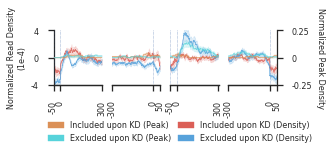

In [6]:
import matplotlib.patches as mpatches
import matplotlib


# ax1.set_ylim(-0.001, 0.001)
FONTSIZE = 8

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(4, 1))


axs = [ax1, ax2, ax3, ax4]

ax5 = ax1.twinx()
ax6 = ax2.twinx()
ax7 = ax3.twinx()
ax8 = ax4.twinx()

paxs = [ax5, ax6, ax7, ax8]


RDPlotter.plot_se([density_incl, density_excl], axs, density_colors) # density_bg
PeakPlotter.plot_se([peak_incl, peak_excl], paxs, legend=False) # peak_bg
ax1.set_ylabel("Normalized Read Density\n(1e-4)", size=FONTSIZE)
ax5.yaxis.set_visible(False)
ax8.yaxis.set_visible(True)
ax8.set_ylabel("Normalized Peak Density", rotation=270, size=FONTSIZE)


# plt.tight_layout()

for ax in axs:
    ax.tick_params(labelsize=FONTSIZE)
    ax.set_ylim(-0.0004, 0.0004)
    
for ax in paxs:
    ax.tick_params(labelsize=FONTSIZE)
    ax.set_ylim(-0.25, 0.25)

ax1.yaxis.set_ticks([-.0004,0,0.0004])
ax1.yaxis.set_ticklabels([-4, 0,4])
sns.despine(ax=ax1, top=True, left=False, right=True)

ax8.yaxis.set_ticks([-.25,0,0.25])
ax8.yaxis.set_ticklabels([-0.25,0,0.25])
sns.despine(ax=ax8, top=True, left=True, right=False)
ax8.yaxis.tick_right()
ax8.yaxis.set_label_coords(2, 0.5) 

incl_peak_patch = mpatches.Patch(color=peak_colors[0], label='Included upon KD (Peak)')
excl_peak_patch = mpatches.Patch(color=peak_colors[1], label='Excluded upon KD (Peak)')
incl_density_patch = mpatches.Patch(color=density_colors[0], label='Included upon KD (Density)')
excl_density_patch = mpatches.Patch(color=density_colors[1], label='Excluded upon KD (Density)')

leg = axs[0].legend(
    bbox_to_anchor=(2.5, -0.6), loc=1, mode="expand",
    handles=[incl_density_patch, excl_density_patch, incl_peak_patch, excl_peak_patch],
    borderaxespad=0., ncol=2, fontsize=FONTSIZE
)
f.savefig('/home/bay001/projects/gabe_qc_20170612/analysis/204_01_RBFOX2_peak_vs_density.svg')

# Plotting w/ p-value heatmap

In [7]:

excl_read_pvalue = '/projects/ps-yeolab3/bay001/maps/current/se/204_01_RBFOX2.merged.r2.1.RBFOX2-BGHLV26-HepG2-excluded-upon-knockdown.mannwhitney.txt'
incl_read_pvalue = '/projects/ps-yeolab3/bay001/maps/current/se/204_01_RBFOX2.merged.r2.1.RBFOX2-BGHLV26-HepG2-included-upon-knockdown.mannwhitney.txt'

excl_peak_pvalue = '/projects/ps-yeolab3/bay001/maps/current/se_peak/204_01.basedon_204_01.peaks.l2inputnormnew.bed.compressed.Excluded_upon_knockdown_(138_events).pvalue'
incl_peak_pvalue = '/projects/ps-yeolab3/bay001/maps/current/se_peak/204_01.basedon_204_01.peaks.l2inputnormnew.bed.compressed.Included_upon_knockdown_(113_events).pvalue'

def split(lst, n):
    """
    Splits list (lst) into n equal parts.

    Parameters
    ----------
    lst : list
    n : int

    Returns
    -------
    newlist : list
        a list of equally portioned n sublists
    """
    newlist = []
    division = len(lst) / float(n)
    for i in xrange(n):
        newlist.append(
            lst[int(round(division * i)):int(round(division * (i + 1)))])
    return newlist

def plot_heatmap(lst, axs, colors, remove_lines):
    num_regions = 4
    pvalues = split(lst, num_regions)
    for i in range(0, num_regions):
        axs[i].pcolor(
            [pvalues[i]], 
            cmap=colors
        )
        axs[i].set_yticklabels([''])
        axs[i].set_yticks([''])
        axs[i].xaxis.set_visible(False)
        axs[i].set_ylim(0, 1)
        if remove_lines:
            sns.despine(ax=axs[i], top=True, left=True, right=True, bottom=True)


In [8]:
import matplotlib.gridspec as gridspec

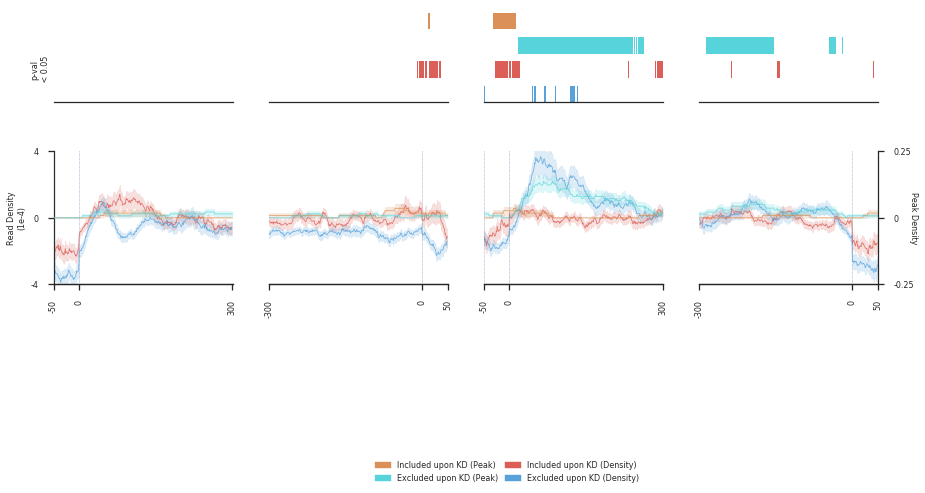

In [9]:
fig = plt.figure(figsize=(20, 5))
full_grid = gridspec.GridSpec(6, 4, height_ratios=[1, 1, 1, 1, 2, 8])

excl_read_heatmap_row = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=full_grid[3, 1:4])
incl_read_heatmap_row = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=full_grid[2, 1:4])
excl_peak_heatmap_row = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=full_grid[1, 1:4])
incl_peak_heatmap_row = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=full_grid[0, 1:4])
spacer_row = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=full_grid[4, 1:4])

map_row = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=full_grid[5, 1:4])

read_map_regions = []
peak_map_regions = []

excl_read_heatmap_regions = []
incl_read_heatmap_regions = []
excl_peak_heatmap_regions = []
incl_peak_heatmap_regions = []

for i in range(4):
    read_map_regions.append(plt.subplot(map_row[i:i+1]))
    peak_map_regions.append(read_map_regions[i].twinx())
    excl_read_heatmap_regions.append(plt.subplot(excl_read_heatmap_row[i:i+1]))
    incl_read_heatmap_regions.append(plt.subplot(incl_read_heatmap_row[i:i+1]))
    excl_peak_heatmap_regions.append(plt.subplot(excl_peak_heatmap_row[i:i+1]))
    incl_peak_heatmap_regions.append(plt.subplot(incl_peak_heatmap_row[i:i+1]))

RDPlotter.plot_se([density_incl, density_excl], read_map_regions, density_colors) # density_bg
PeakPlotter.plot_se([peak_incl, peak_excl], peak_map_regions, legend=False) # peak_bg

incl_read_heatmap_regions[0].set_ylabel('p-val\n < 0.05', size=FONTSIZE)

read_map_regions[0].set_ylabel("Read Density\n(1e-4)", size=FONTSIZE)
read_map_regions[3].yaxis.set_visible(False)

peak_map_regions[0].yaxis.set_visible(False)
peak_map_regions[3].yaxis.set_visible(True)
peak_map_regions[3].set_ylabel("Peak Density", rotation=270, size=FONTSIZE)
peak_map_regions[3].yaxis.tick_right()

for ax in read_map_regions:
    ax.tick_params(labelsize=FONTSIZE)
    ax.set_ylim(-0.0004, 0.0004)
    
for ax in peak_map_regions:
    ax.tick_params(labelsize=FONTSIZE)
    ax.set_ylim(-0.25, 0.25)

read_map_regions[0].yaxis.set_ticks([-.0004,0,0.0004])
read_map_regions[0].yaxis.set_ticklabels([-4, 0,4])
peak_map_regions[3].yaxis.set_ticks([-.25,0,0.25])
peak_map_regions[3].yaxis.set_ticklabels([-0.25,0,0.25])
sns.despine(ax=read_map_regions[0], top=True, left=False, right=True)
sns.despine(ax=peak_map_regions[3], top=True, left=True, right=False)

# create lists of things to make parsing easier
pvalue_files = [incl_peak_pvalue, excl_peak_pvalue, incl_read_pvalue, excl_read_pvalue]

heatmap_regions = [
    incl_peak_heatmap_regions,
    excl_peak_heatmap_regions,
    incl_read_heatmap_regions,
    excl_read_heatmap_regions
]

# need to create cmaps based on each peak/read color
read_excl_cmap = matplotlib.colors.ListedColormap(['white', density_colors[1]], name='from_list', N=None)
read_incl_cmap = matplotlib.colors.ListedColormap(['white', density_colors[0]], name='from_list', N=None)
peak_excl_cmap = matplotlib.colors.ListedColormap(['white', peak_colors[1]], name='from_list', N=None)
peak_incl_cmap = matplotlib.colors.ListedColormap(['white', peak_colors[0]], name='from_list', N=None)

colors = [
    peak_incl_cmap, peak_excl_cmap, read_incl_cmap, read_excl_cmap
]

def mask(l):
    """
    Return 0 if not significant (anything less than 1.3ish)
    """
    return 0 if l < -np.log10(0.05) else 1

# plot the heatmaps
for i in range(0, len(pvalue_files)):
    lst = []
    lst = open(pvalue_files[i], 'r').readlines()
    lst = [float(l.rstrip().split('\t')[1]) for l in lst]
    if i >= 2: # the read density pvalues are just pvalues, so let's plot the -log10 (fix later)
        lst = [-np.log10(p) for p in lst]
    # hide anything that isn't significant.
    lst = [mask(l) for l in lst]
    # 
    remove_lines = True if i !=3 else False
    
    plot_heatmap(lst, heatmap_regions[i], colors[i], remove_lines)


incl_peak_patch = mpatches.Patch(color=peak_colors[0], label='Included upon KD (Peak)')
excl_peak_patch = mpatches.Patch(color=peak_colors[1], label='Excluded upon KD (Peak)')
incl_density_patch = mpatches.Patch(color=density_colors[0], label='Included upon KD (Density)')
excl_density_patch = mpatches.Patch(color=density_colors[1], label='Excluded upon KD (Density)')

leg = read_map_regions[0].legend(
    bbox_to_anchor=(2.5, -1.3), loc=1, mode="expand",
    handles=[incl_density_patch, excl_density_patch, incl_peak_patch, excl_peak_patch],
    borderaxespad=0., ncol=2, fontsize=FONTSIZE
)

fig.savefig('/home/bay001/projects/gabe_qc_20170612/analysis/204_01_RBFOX2_peak_vs_density_with_pvalue_heatmaps.svg')

In [10]:
len(read_map_regions)

4

In [11]:
axs